# Bibliotecas

In [116]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

from sklearn.impute import KNNImputer



# Carregando os dados iniciais

In [2]:
df = pd.read_csv("solicitacoescredito.csv");
df.head()
#with pd.ExcelWriter("planilha_excel.xlsx") as writer:
#    df.to_excel(writer)


,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


# Análise dos dados

In [3]:
explore(df)

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
anoFundacao,float64,8228,745,0.083,69,1000.0,2000.0,2009.0,2015.0,2020.0,2006.027467,2009.0,19.42412,-34.097417
ativoCirculante,float64,4733,4240,0.473,1794,-17.0,887585.0,3996630.0,16351166.0,29038320000.0,44510281.217198,3996630.0,467453419.135309,52.136866
capitalSocial,float64,8228,745,0.083,403,0.0,50000.0,100000.0,500000.0,4100000000.0,11214526.111206,100000.0,97428533.712852,17.515072
cnpjSemTraco,object,8973,0,0.000,2829,AADG56617962174727,-,-,-,ZZVU59020803434073,-,-,-,-
custos,float64,8223,750,0.084,1743,-346633805.0,0.0,0.0,4520907.0,4393536000.0,28390609.774048,0.0,207214754.513864,15.493629
dashboardCorrelacao,float64,8973,0,0.000,701,-0.99999,0.0,0.0,0.0,0.99999,0.047236,0.0,0.472476,0.027046
dataAprovadoEmComite,object,558,8415,0.938,558,-,-,-,-,-,-,-,-,-
dataAprovadoNivelAnalista,object,7011,1962,0.219,7011,-,-,-,-,-,-,-,-,-
definicaoRisco,object,8973,0,0.000,4,De 0 a 10 % - Muito Baixo,-,-,-,De 51 a 80 % - Alto,-,-,-,-
diferencaPercentualRisco,float64,8973,0,0.000,79,0.207547,0.642857,0.75,0.857143,1.0,0.750321,0.75,0.146058,-0.220014


## Observando o relatório acima podemos tirar as seguintes conclusões:
1) Temos muito valores nulos. Principalmente relacionados a informações do DRE das empresas.
2) 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [5]:
df_certo = df.copy()

In [6]:
for cnpj in df_certo.cnpjSemTraco.unique():
    print('-'*30)
    for linha in df_certo[df_certo.cnpjSemTraco == cnpj].values:
        print(cnpj, linha[0], linha[18])

------------------------------
KEBE17609492220843 1 nan
KEBE17609492220843 3231 2019-12-31T03:00:00
KEBE17609492220843 3994 2019-12-31T03:00:00
KEBE17609492220843 7373 2019-12-31T03:00:00
------------------------------
JRBK88908250677300 2 nan
------------------------------
GCVQ28531614261293 3 nan
GCVQ28531614261293 3018 nan
GCVQ28531614261293 3377 nan
GCVQ28531614261293 4051 2019-12-31T03:00:00
GCVQ28531614261293 4615 2019-12-31T03:00:00
GCVQ28531614261293 7430 2019-12-31T03:00:00
------------------------------
KJND32266018316396 4 nan
KJND32266018316396 57 nan
------------------------------
CGQN15826802440348 5 2019-09-30T00:00:00
CGQN15826802440348 2178 nan
CGQN15826802440348 3677 nan
CGQN15826802440348 6290 2019-12-31T03:00:00
------------------------------
KAYS53232027306925 6 nan
KAYS53232027306925 1125 nan
KAYS53232027306925 1129 nan
KAYS53232027306925 1146 nan
KAYS53232027306925 2734 nan
KAYS53232027306925 4274 nan
KAYS53232027306925 7723 nan
------------------------------
PYO

In [7]:

pd.options.mode.chained_assignment = None

for cnpj in df_certo.cnpjSemTraco.unique():
    registros = []
    for linha in df_certo[df_certo.cnpjSemTraco == cnpj].values:
        if isinstance(linha[18], float):
            registros.append(linha[0])
        elif len(registros) != 0:
            for reg in registros:
                df_certo.periodoBalanco[df_certo.numero_solicitacao == reg] = linha[18]
                df_certo.ativoCirculante[df_certo.numero_solicitacao == reg] = linha[19]
                df_certo.endividamento[df_certo.numero_solicitacao == reg] = linha[23]
                df_certo.estoque[df_certo.numero_solicitacao == reg] = linha[25]
                df_certo.duplicatasAReceber[df_certo.numero_solicitacao == reg] = linha[24]
                df_certo.passivoCirculante[df_certo.numero_solicitacao == reg] = linha[20]
                df_certo.totalAtivo[df_certo.numero_solicitacao == reg] = linha[21]
                df_certo.totalPatrimonioLiquido[df_certo.numero_solicitacao == reg] = linha[22]
                
                df_certo.restricoes[df_certo.numero_solicitacao == reg] = linha[33]
                df_certo.custos[df_certo.numero_solicitacao == reg] = linha[29]
                df_certo.capitalSocial[df_certo.numero_solicitacao == reg] = linha[32]
                df_certo.anoFundacao[df_certo.numero_solicitacao == reg] = linha[30]
                df_certo.empresa_MeEppMei[df_certo.numero_solicitacao == reg] = linha[34]
                df_certo.faturamentoBruto[df_certo.numero_solicitacao == reg] = linha[26]
                df_certo.intervaloFundacao[df_certo.numero_solicitacao == reg] = linha[31]
                df_certo.periodoDemonstrativoEmMeses[df_certo.numero_solicitacao == reg] = linha[28]
                
                df_certo.limiteEmpresaAnaliseCredito[df_certo.numero_solicitacao == reg] = linha[36]
                df_certo.margemBruta[df_certo.numero_solicitacao == reg] = linha[27]
                df_certo.primeiraCompra[df_certo.numero_solicitacao == reg] = linha[7]
                df_certo.percentualProtestos[df_certo.numero_solicitacao == reg] = linha[6]
            registros = []
       

In [8]:
for cnpj in df_certo.cnpjSemTraco.unique():
    print('-'*30)
    for linha in df_certo[df_certo.cnpjSemTraco == cnpj].values:
        print(cnpj, linha[0], linha[18])

------------------------------
KEBE17609492220843 1 2019-12-31T03:00:00
KEBE17609492220843 3231 2019-12-31T03:00:00
KEBE17609492220843 3994 2019-12-31T03:00:00
KEBE17609492220843 7373 2019-12-31T03:00:00
------------------------------
JRBK88908250677300 2 nan
------------------------------
GCVQ28531614261293 3 2019-12-31T03:00:00
GCVQ28531614261293 3018 2019-12-31T03:00:00
GCVQ28531614261293 3377 2019-12-31T03:00:00
GCVQ28531614261293 4051 2019-12-31T03:00:00
GCVQ28531614261293 4615 2019-12-31T03:00:00
GCVQ28531614261293 7430 2019-12-31T03:00:00
------------------------------
KJND32266018316396 4 nan
KJND32266018316396 57 nan
------------------------------
CGQN15826802440348 5 2019-09-30T00:00:00
CGQN15826802440348 2178 2019-12-31T03:00:00
CGQN15826802440348 3677 2019-12-31T03:00:00
CGQN15826802440348 6290 2019-12-31T03:00:00
------------------------------
KAYS53232027306925 6 nan
KAYS53232027306925 1125 nan
KAYS53232027306925 1129 nan
KAYS53232027306925 1146 nan
KAYS53232027306925 273

In [9]:
explore(df_certo)

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
anoFundacao,float64,8721,252,0.028,67,1000.0,2000.0,2009.0,2015.0,2020.0,2006.063525,2009.0,19.025233,-34.249779
ativoCirculante,float64,6012,2961,0.330,1794,-17.0,529853.0,3230248.0,13960113.0,29038320000.0,39651462.462409,3230248.0,419804345.273875,56.791138
capitalSocial,float64,8721,252,0.028,401,0.0,50000.0,100000.0,500000.0,4100000000.0,11389596.388488,100000.0,96143161.12243,17.328462
cnpjSemTraco,object,8973,0,0.000,2829,AADG56617962174727,-,-,-,ZZVU59020803434073,-,-,-,-
custos,float64,8718,255,0.028,1730,-346633805.0,0.0,47166.0,5612933.0,4393536000.0,31362050.954347,47166.0,228829361.705735,14.890923
dashboardCorrelacao,float64,8973,0,0.000,701,-0.99999,0.0,0.0,0.0,0.99999,0.047236,0.0,0.472476,0.027046
dataAprovadoEmComite,object,558,8415,0.938,558,-,-,-,-,-,-,-,-,-
dataAprovadoNivelAnalista,object,7011,1962,0.219,7011,-,-,-,-,-,-,-,-,-
definicaoRisco,object,8973,0,0.000,4,De 0 a 10 % - Muito Baixo,-,-,-,De 51 a 80 % - Alto,-,-,-,-
diferencaPercentualRisco,float64,8973,0,0.000,79,0.207547,0.642857,0.75,0.857143,1.0,0.750321,0.75,0.146058,-0.220014


In [10]:
df_certo_final = df_certo[~(df_certo.periodoBalanco.isnull())]

In [11]:
explore(df_certo_final)

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
anoFundacao,float64,6012,0,0.000,64,1000.0,2000.0,2009.0,2014.0,2020.0,2005.571025,2009.0,17.479035,-32.157992
ativoCirculante,float64,6012,0,0.000,1794,-17.0,529853.0,3230248.0,13960113.0,29038320000.0,39651462.462409,3230248.0,419804345.273875,56.791138
capitalSocial,float64,6012,0,0.000,296,0.0,95400.0,200000.0,800000.0,4100000000.0,11238712.395376,200000.0,94048613.884539,21.749373
cnpjSemTraco,object,6012,0,0.000,1523,AADG56617962174727,-,-,-,ZZVU59020803434073,-,-,-,-
custos,float64,6010,2,0.000,1690,-346633805.0,0.0,2171507.0,12744094.0,4393536000.0,45022236.062396,2171507.0,273814988.466991,12.44144
dashboardCorrelacao,float64,6012,0,0.000,519,-0.99999,0.0,0.0,0.0,0.99999,0.037182,0.0,0.499997,-0.016924
dataAprovadoEmComite,object,443,5569,0.926,443,-,-,-,-,-,-,-,-,-
dataAprovadoNivelAnalista,object,4652,1360,0.226,4652,-,-,-,-,-,-,-,-,-
definicaoRisco,object,6012,0,0.000,4,De 0 a 10 % - Muito Baixo,-,-,-,De 51 a 80 % - Alto,-,-,-,-
diferencaPercentualRisco,float64,6012,0,0.000,77,0.207547,0.679245,0.785714,0.857143,1.0,0.772923,0.785714,0.137616,-0.328264


In [12]:
df_certo_final.to_csv('dados_analise_cluster.csv', index=False)

In [13]:
df_aprovados = df_certo_final[~(df_certo_final.valorAprovado.isnull())]
df_aprovados

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,922289.0,2003.0,Acima de 17 anos,90000.0,False,True,1.000000,72600.0,2020-02-03T20:57:33
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,12.0,1485136.0,2014.0,De 6 a 10 anos,20000.0,False,False,1.000000,5760.0,2020-02-04T16:40:49
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.000000,89000.0,2020-02-04T15:06:28
6,7,Alexander Baker-Wells,Dr. Caroline Ali,PYOL43118620147076,16,0.000000,NaN,2011-03-02T11:27:13,0,0.00,...,12.0,45795943.0,2004.0,De 11 a 16 anos,30515674.0,True,False,0.000000,20635703.0,2020-02-05T14:31:22
7,8,Jean Berry,Gregory Gould,NLUX93496216176463,4,0.350175,0.0,2007-07-02T00:00:00,102,208980.00,...,9.0,0.0,2000.0,Acima de 17 anos,120000.0,False,False,1.000000,768233.0,2020-02-05T20:05:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8955,9028,Andrew Noble-Collins,Carl Martin,MHSR66697802682645,0,0.387860,0.0,2020-12-21T00:00:00,39,20907.00,...,12.0,17208734.0,1985.0,Acima de 17 anos,300000.0,False,False,1.000000,720.0,2021-02-25T20:06:47
8957,9030,Mr. Gerald Wilson,Katie Barlow,ISPY81393760117061,4,0.194429,0.0,2019-05-16T00:00:00,0,0.00,...,12.0,212783.0,2017.0,De 0 a 5 anos,100000.0,False,True,1.000000,55500.0,2021-02-25T20:13:33
8958,9031,Joel Allan,Gavin Holden,XIIJ66670040144884,4,0.536739,0.0,2013-02-07T00:00:00,28,6804.00,...,12.0,88667750.0,2010.0,De 11 a 16 anos,833345.0,False,False,0.999005,7200000.0,2021-02-25T20:33:36
8960,9033,Jamie Cox,Kirsty Jones,IPFS70635894073808,0,0.462250,0.0,2020-07-31T00:00:00,0,0.00,...,12.0,5145588.0,2018.0,De 0 a 5 anos,110000.0,False,True,1.000000,3240.0,2021-02-25T20:40:58


In [14]:
df_aprovados.fillna(value={'custos': 43925049.88, 'faturamentoBruto': 81954930.29, 'margemBruta': 25636419.82, 'periodoDemonstrativoEmMeses': 10.62}, inplace=True)

In [15]:
explore(df_aprovados)

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
anoFundacao,float64,5095,0,0.000,64,1000.0,2000.0,2008.0,2014.0,2020.0,2005.276546,2008.0,18.415723,-32.362799
ativoCirculante,float64,5095,0,0.000,1718,-17.0,630894.5,3319814.0,14246196.0,29038320000.0,40732057.162905,3319814.0,450279614.87434,54.208593
capitalSocial,float64,5095,0,0.000,291,0.0,95400.0,200000.0,800000.0,4100000000.0,10284678.840824,200000.0,90973084.212371,25.400868
cnpjSemTraco,object,5095,0,0.000,1460,AADG56617962174727,-,-,-,ZZVU59020803434073,-,-,-,-
custos,float64,5095,0,0.000,1623,-346633805.0,0.0,2330486.0,13891374.5,4393536000.0,43925049.877676,2330486.0,258222526.669335,12.597953
dashboardCorrelacao,float64,5095,0,0.000,510,-0.99999,0.0,0.0,0.0,0.99999,0.032689,0.0,0.52347,-0.02792
dataAprovadoEmComite,object,443,4652,0.913,443,-,-,-,-,-,-,-,-,-
dataAprovadoNivelAnalista,object,4652,443,0.087,4652,-,-,-,-,-,-,-,-,-
definicaoRisco,object,5095,0,0.000,4,De 0 a 10 % - Muito Baixo,-,-,-,De 51 a 80 % - Alto,-,-,-,-
diferencaPercentualRisco,float64,5095,0,0.000,73,0.264151,0.678571,0.767857,0.857143,1.0,0.758919,0.767857,0.121311,-0.492707


In [16]:
df_aprovados.to_csv('dados_regressao.csv', index=False)

In [69]:
df_temporal = df[['dataAprovadoNivelAnalista', 'dataAprovadoEmComite', 'valorAprovado']]
df_temporal['dataAprovadoEmComite'].fillna(df_temporal['dataAprovadoNivelAnalista'], inplace=True)
df_temporal.drop('dataAprovadoNivelAnalista', axis=1, inplace=True)
df_temporal.rename({'dataAprovadoEmComite': 'data'}, axis=1, inplace=True)
df_temporal.dropna(inplace=True)
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7569 entries, 0 to 8961
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data           7569 non-null   object 
 1   valorAprovado  7569 non-null   float64
dtypes: float64(1), object(1)
memory usage: 177.4+ KB


In [70]:
df_temporal.data[0][:-9]
df_temporal.data = [x[:-9] for x in df_temporal.data]

In [71]:
df_temporal

,data,valorAprovado
0,2020-02-03,50000.0
2,2020-02-04,20000.0
3,2020-02-04,15000.0
4,2020-02-04,50000.0
5,2020-02-04,20000.0
...,...,...
8956,2021-02-25,45000.0
8957,2021-02-25,15000.0
8958,2021-02-25,1500000.0
8960,2021-02-25,20000.0


In [103]:
df_ano = df_temporal.groupby('data', as_index=False).sum()
df_ano.sort_values('data', inplace=True)
df_ano

,data,valorAprovado
0,2020-02-03,50000.0
1,2020-02-04,1243000.0
2,2020-02-05,2952000.0
3,2020-02-06,5545000.0
4,2020-02-07,4685000.0
...,...,...
259,2021-02-19,7911900.0
260,2021-02-22,4272000.0
261,2021-02-23,13826500.0
262,2021-02-24,7255000.0


In [101]:
df_dias = pd.date_range(start='2020-02-03', end='2021-02-25')
df_dias = df_dias.format(formatter=lambda x: x.strftime('%Y-%m-%d'))
df_dias = pd.DataFrame(df_dias, columns=['data'])
df_dias

,data
0,2020-02-03
1,2020-02-04
2,2020-02-05
3,2020-02-06
4,2020-02-07
...,...
384,2021-02-21
385,2021-02-22
386,2021-02-23
387,2021-02-24


In [115]:
df_data_final = pd.merge(df_dias, df_ano, how='left')
df_data_final

,data,valorAprovado
0,2020-02-03,50000.0
1,2020-02-04,1243000.0
2,2020-02-05,2952000.0
3,2020-02-06,5545000.0
4,2020-02-07,4685000.0
...,...,...
384,2021-02-21,NaN
385,2021-02-22,4272000.0
386,2021-02-23,13826500.0
387,2021-02-24,7255000.0


In [128]:
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
df_data_final.valorAprovado = imputer.fit_transform(df_data_final[['valorAprovado']])

In [129]:
df_data_final.head(-5)

,data,valorAprovado
0,2020-02-03,5.000000e+04
1,2020-02-04,1.243000e+06
2,2020-02-05,2.952000e+06
3,2020-02-06,5.545000e+06
4,2020-02-07,4.685000e+06
...,...,...
379,2021-02-16,5.441439e+06
380,2021-02-17,1.603600e+07
381,2021-02-18,1.370750e+07
382,2021-02-19,7.911900e+06


<AxesSubplot:ylabel='valorAprovado'>

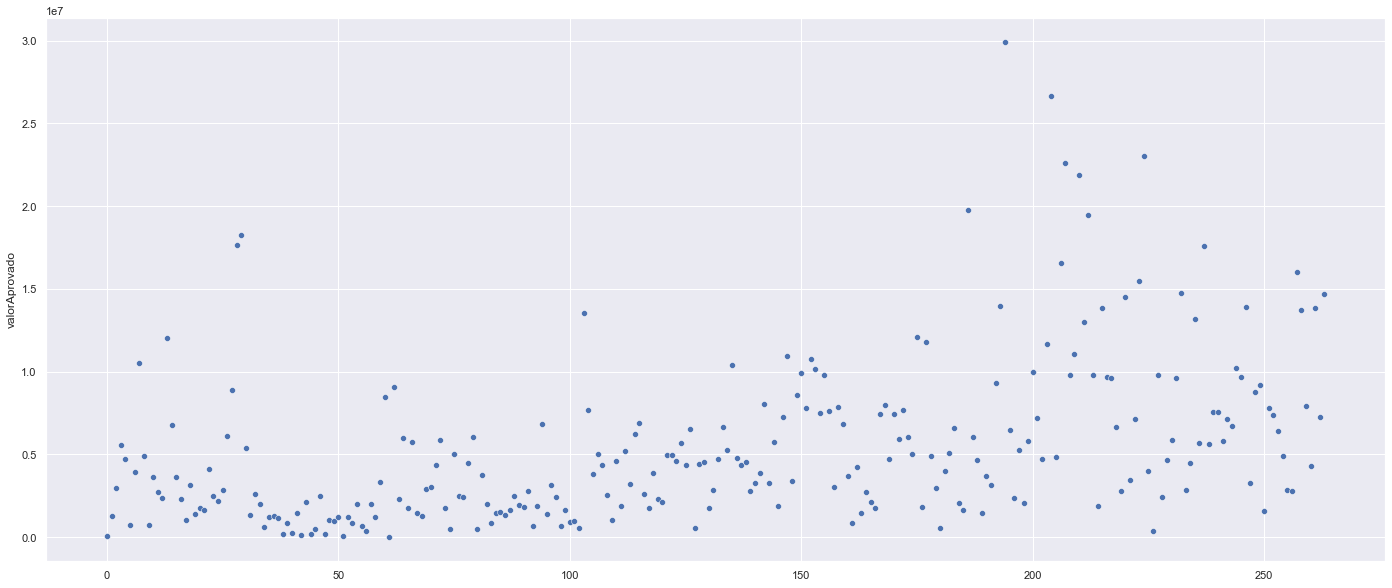

In [117]:
fig = plt.figure(figsize=(24,10))
sns.scatterplot(x=df_ano.index, y=df_ano.valorAprovado)